In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Загрузка данных
imdb_df = pd.read_csv("imdb_top_1000.csv")

# Основая информация
print("\nImdb_df")
print(imdb_df.head())


Imdb_df
                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                

In [3]:
# Проверка на пропуски
print("\nImdb_df")
print(imdb_df.isnull().sum())


Imdb_df
Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [4]:
# Удаляем строки с NaN
cleaned_imdb_df = imdb_df.dropna(subset=["IMDB_Rating", "Released_Year", "Genre", "Director"], how="any")

print("\nImdb_df")
print(cleaned_imdb_df)


Imdb_df
                                           Poster_Link  \
0    https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1    https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2    https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3    https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4    https://m.media-amazon.com/images/M/MV5BMWU4N2...   
..                                                 ...   
995  https://m.media-amazon.com/images/M/MV5BNGEwMT...   
996  https://m.media-amazon.com/images/M/MV5BODk3Yj...   
997  https://m.media-amazon.com/images/M/MV5BM2U3Yz...   
998  https://m.media-amazon.com/images/M/MV5BZTBmMj...   
999  https://m.media-amazon.com/images/M/MV5BMTY5OD...   

                 Series_Title Released_Year Certificate  Runtime  \
0    The Shawshank Redemption          1994           A  142 min   
1               The Godfather          1972           A  175 min   
2             The Dark Knight          2008          UA  152 min   
3      The Godfather: 

In [5]:
# Посмотрим уникальные значения в столбце
print(cleaned_imdb_df['Released_Year'].unique())

['1994' '1972' '2008' '1974' '1957' '2003' '1993' '2010' '1999' '2001'
 '1966' '2002' '1990' '1980' '1975' '2020' '2019' '2014' '1998' '1997'
 '1995' '1991' '1977' '1962' '1954' '1946' '2011' '2006' '2000' '1988'
 '1985' '1968' '1960' '1942' '1936' '1931' '2018' '2017' '2016' '2012'
 '2009' '2007' '1984' '1981' '1979' '1971' '1963' '1964' '1950' '1940'
 '2013' '2005' '2004' '1992' '1987' '1986' '1983' '1976' '1973' '1965'
 '1959' '1958' '1952' '1948' '1944' '1941' '1927' '1921' '2015' '1996'
 '1989' '1978' '1961' '1955' '1953' '1925' '1924' '1982' '1967' '1951'
 '1949' '1939' '1937' '1934' '1928' '1926' '1920' '1970' '1969' '1956'
 '1947' '1945' '1930' '1938' '1935' '1933' '1932' '1922' '1943' 'PG']


In [6]:
cleaned_imdb_df['Released_Year'] = pd.to_numeric(cleaned_imdb_df['Released_Year'], errors='coerce')  # "PG" станет NaN
cleaned_imdb_df = cleaned_imdb_df.dropna(subset=['Released_Year'])
cleaned_imdb_df['Released_Year'] = cleaned_imdb_df['Released_Year'].astype(int)  # Конвертируем в целое число

In [7]:
# Проверяем
print(cleaned_imdb_df['Released_Year'].unique())

[1994 1972 2008 1974 1957 2003 1993 2010 1999 2001 1966 2002 1990 1980
 1975 2020 2019 2014 1998 1997 1995 1991 1977 1962 1954 1946 2011 2006
 2000 1988 1985 1968 1960 1942 1936 1931 2018 2017 2016 2012 2009 2007
 1984 1981 1979 1971 1963 1964 1950 1940 2013 2005 2004 1992 1987 1986
 1983 1976 1973 1965 1959 1958 1952 1948 1944 1941 1927 1921 2015 1996
 1989 1978 1961 1955 1953 1925 1924 1982 1967 1951 1949 1939 1937 1934
 1928 1926 1920 1970 1969 1956 1947 1945 1930 1938 1935 1933 1932 1922
 1943]


<Axes: xlabel='Released_Year', ylabel='IMDB_Rating'>

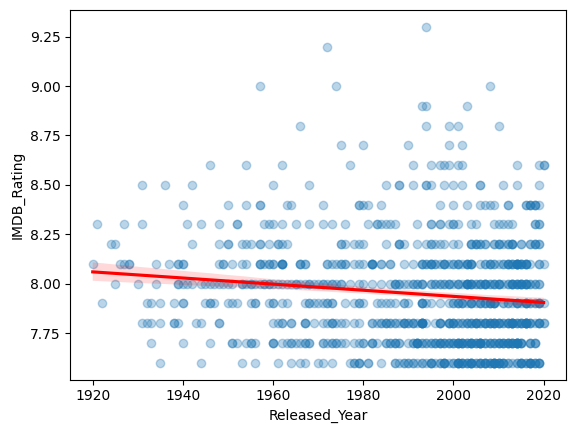

In [8]:
# Построим график Зависимости рейтинга от года выхода
sns.regplot(
    x='Released_Year',
    y='IMDB_Rating',
    data = cleaned_imdb_df,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'red'}
)

По графику можно увидеть, что рейтинг снижается с течением времени. Количество выпущенных современных фильмов больше, чем старых. Также современные фильмы стабильнее по рейтингу.

In [ ]:
# Группируем данные
top_directors = cleaned_imdb_df["Director"].value_counts().head(10)
print(top_directors)

Director
Alfred Hitchcock     14
Steven Spielberg     13
Hayao Miyazaki       11
Akira Kurosawa       10
Martin Scorsese      10
Woody Allen           9
Stanley Kubrick       9
Billy Wilder          9
Clint Eastwood        8
Christopher Nolan     8
Name: count, dtype: int64


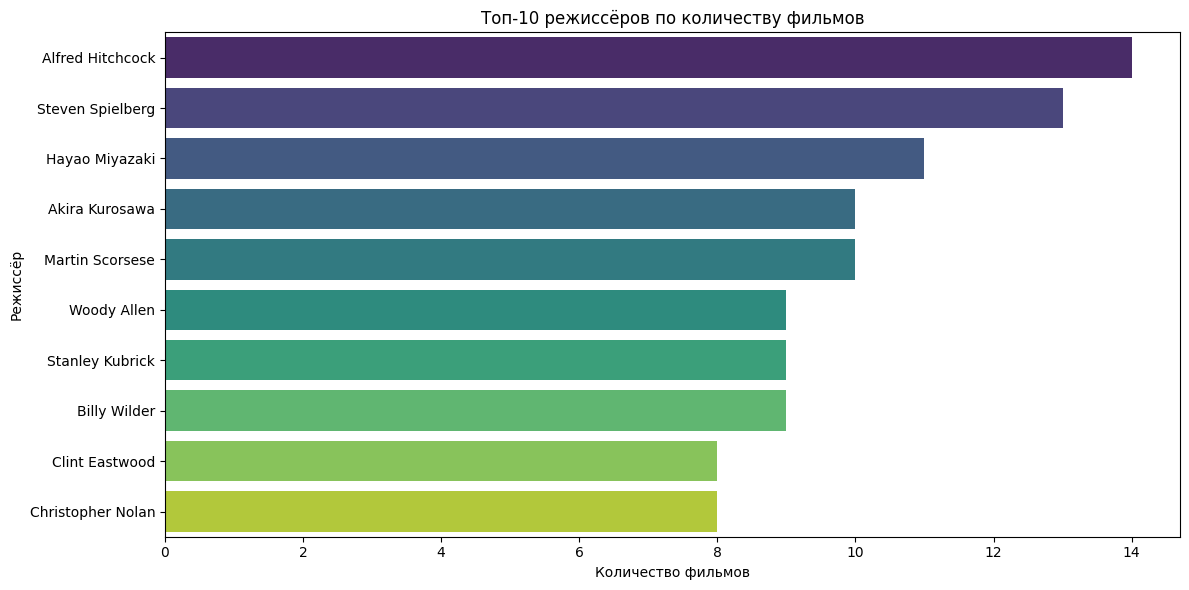

In [ ]:
plt.figure(figsize=(12, 6))

# Преобразуем Series в DataFrame
top_directors_df = top_directors.reset_index()
top_directors_df.columns = ['Director', 'Movie_Count']

sns.barplot(
    x='Movie_Count',
    y='Director',
    data=top_directors_df,
    hue='Director',
    palette='viridis',
    legend=False
)

plt.title('Топ-10 режиссёров по количеству фильмов')
plt.xlabel('Количество фильмов')
plt.ylabel('Режиссёр')
plt.tight_layout()
plt.show()